### Introduction to Scikit-Learn

In [382]:
#  it's machine learning library in python
#  built on numpy and matplotlib
#  has in-built machine learning models
#  very well designed API 

In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# content
0. An end-to-end scikit learn workflow
1. Getting the data ready
2. Choose the right algorithm/estimator for our problem
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating the model
5. Improve the model
6. save and load a trained model
7. putting it all together!

In [384]:
# let's listify the content
content = ["0. An end-to-end scikit learn workflow",
          "1. Getting the data ready",
          "2. Choose the right algorithm/estimator for our problem",
          "3.Fit the model/algorithm and use it to make predictions on our data",
          "4. Evaluating the model",
          "5. Improve the model",
          "6. save and load a trained model",
          "7. putting it all together!"]
content

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choose the right algorithm/estimator for our problem',
 '3.Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. save and load a trained model',
 '7. putting it all together!']

### 0. End to end scikit learn workflow
[just for complete overview before going step by step]

In [385]:
# 1. get the data ready
disease = pd.read_csv("heart-disease.csv")
disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [386]:
x =  disease.drop('target',axis =1) # feature matrix/data/variable
y = disease['target']   # labels

In [387]:
#2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# we will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [388]:
# 3. Fit the model to the trainning data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [389]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [390]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3


In [391]:
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [392]:
y_test

47     1
79     1
86     1
201    0
270    0
      ..
167    0
206    0
84     1
32     1
215    0
Name: target, Length: 61, dtype: int64

In [393]:
# 4. evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [394]:
clf.score(x_test, y_test)

0.7049180327868853

In [395]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68        31
           1       0.67      0.80      0.73        30

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.71      0.70      0.70        61



In [396]:
confusion_matrix(y_test, y_preds)

array([[19, 12],
       [ 6, 24]], dtype=int64)

In [397]:
accuracy_score(y_test,y_preds)

0.7049180327868853

In [398]:
# improve the model
# try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying modelwith {i} esimators...")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(x_train,y_train)
    print(f"model accuracy on test set: {clf.score(x_test,y_test)*100:.2f}%")
    print(" ")
    

trying modelwith 10 esimators...
model accuracy on test set: 73.77%
 
trying modelwith 20 esimators...
model accuracy on test set: 73.77%
 
trying modelwith 30 esimators...
model accuracy on test set: 72.13%
 
trying modelwith 40 esimators...
model accuracy on test set: 75.41%
 
trying modelwith 50 esimators...
model accuracy on test set: 75.41%
 
trying modelwith 60 esimators...
model accuracy on test set: 72.13%
 
trying modelwith 70 esimators...
model accuracy on test set: 72.13%
 
trying modelwith 80 esimators...
model accuracy on test set: 72.13%
 
trying modelwith 90 esimators...
model accuracy on test set: 78.69%
 


In [399]:
# 6. save a model and load it
import pickle
pickle.dump(clf, open("random_forest_model1.pkl",'wb'))

<ipython-input-399-02d2690601fe>:3: ResourceWarning: unclosed file <_io.BufferedWriter name='random_forest_model1.pkl'>
  pickle.dump(clf, open("random_forest_model1.pkl",'wb'))


In [400]:
loaded_model = pickle.load(open("random_forest_model1.pkl", "rb"))
loaded_model.score(x_test, y_test)

<ipython-input-400-813ef877f3d6>:1: ResourceWarning: unclosed file <_io.BufferedReader name='random_forest_model1.pkl'>
  loaded_model = pickle.load(open("random_forest_model1.pkl", "rb"))


0.7868852459016393

### warnings in jupyter notebook

In [401]:
import warnings
#warnings.filterwarnings('ignore')  # ignores the all warnings
warnings.filterwarnings('default') # displays warnings

In [402]:
# checking which scikit learn version you are using
import sklearn
sklearn.show_versions()


System:
    python: 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\HP\anaconda3\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
          pip: 20.1.1
   setuptools: 49.2.0.post20200714
      sklearn: 0.23.1
        numpy: 1.18.5
        scipy: 1.5.0
       Cython: 0.29.21
       pandas: 1.0.5
   matplotlib: 3.2.2
       joblib: 0.16.0
threadpoolctl: 2.1.0

Built with OpenMP: True


## 1.0 Getting the data ready
1. split the data into features and labels(ususally x and y)
2. filling (also called imputing) or disregrding the missing values
3. converting non-numerical values to numerical values(a.k.a. feature encoding)

In [403]:
disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [404]:
x = disease.drop('target',axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [405]:
y = disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [406]:
# split data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [407]:
disease.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape

((303, 14), (212, 13), (91, 13), (212,), (91,))

In [408]:
x.shape,y.shape

((303, 13), (303,))

In [409]:
print(303 * 0.7) # 70%   training set
print(303 * 0.3) # 30%  test set

212.1
90.89999999999999


### 1.1 converting data to numbers

In [410]:
sales = pd.read_csv('car-sales-extended.csv')
sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [411]:
sales.shape

(1000, 5)

In [412]:
sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [413]:
x = sales.drop('Price',axis=1)
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [414]:
y = sales['Price']
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [415]:
x.shape,y.shape

((1000, 4), (1000,))

In [416]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [417]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [418]:
sales["Doors"].value_counts() # can be converted to a category type

4    856
5     79
3     65
Name: Doors, dtype: int64

In [419]:
sales["Make"].value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

In [420]:
sales["Colour"].value_counts()

White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64

In [421]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',         # list of tuple
                                  one_hot,categorical_features)],
                               remainder = 'passthrough')
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [422]:
transformed_x.shape

(1000, 13)

In [423]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [424]:
pd.DataFrame(transformed_x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [425]:
dummies = pd.get_dummies(sales[['Make','Colour','Doors']])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [426]:
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)

RandomForestRegressor()

In [427]:
model.score(x_test,y_test)

0.3235867221569877

### 1.2 fixing missing data
1. Fill them with some value(imputation)
2. Remove the samples with missing data altogether

In [428]:
missing_sales = pd.read_csv('car-sales-extended-missing-data.csv')
missing_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [429]:
missing_sales.isna().sum() #missing values

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [430]:
x = missing_sales.drop('Price',axis=1)
y = missing_sales['Price']

In [431]:
# let's covert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',         # list of tuple
                                  one_hot,categorical_features)],
                               remainder = 'passthrough')
transformed_x = transformer.fit_transform(x)
transformed_x

ValueError: Input contains NaN

In [ ]:
missing_sales['Doors'].value_counts()

### option 1: fill missing data with pandas

In [432]:
missing_sales["Make"].fillna('missing',inplace=True)
missing_sales['Colour'].fillna('missing',inplace=True)
missing_sales['Odometer (KM)'].fillna(missing_sales['Odometer (KM)'].mean(),inplace=True)
# missing_sales['Price'].fillna(missing_sales['Price'].mean(),inplace=True)
missing_sales['Doors'].fillna(4,inplace=True)
missing_sales.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [433]:
# remove rows with missing price value
missing_sales.dropna(inplace=True)
missing_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [434]:
missing_sales.shape

(950, 5)

In [435]:
missing_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [436]:
x = missing_sales.drop('Price',axis=1)
y = missing_sales['Price']

In [437]:
# let's covert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',         # list of tuple
                                  one_hot,categorical_features)],
                               remainder = 'passthrough')
transformed_x = transformer.fit_transform(missing_sales)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [438]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


In [439]:
missing_sales['Make'].value_counts()

Toyota     354
Honda      281
Nissan     175
BMW         93
missing     47
Name: Make, dtype: int64

In [440]:
missing_sales['Colour'].value_counts()

White      370
Blue       292
Black       89
Red         81
Green       72
missing     46
Name: Colour, dtype: int64

In [441]:
missing_sales['Odometer (KM)'].value_counts()

131253.237895    48
73869.000000      2
129188.000000     2
220679.000000     1
56534.000000      1
                 ..
101835.000000     1
52054.000000      1
149347.000000     1
229206.000000     1
184320.000000     1
Name: Odometer (KM), Length: 901, dtype: int64

In [442]:
missing_sales['Price'].value_counts()

17076.0    2
17520.0    2
15154.0    2
12402.0    2
7994.0     2
          ..
7350.0     1
7061.0     1
10628.0    1
17065.0    1
6160.0     1
Name: Price, Length: 934, dtype: int64

In [443]:
dummies2 = pd.get_dummies(missing_sales[['Make','Colour','Doors']])
dummies2.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Make_missing,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Colour_missing
0,4.0,0,1,0,0,0,0,0,0,0,1,0
1,5.0,1,0,0,0,0,0,1,0,0,0,0
2,4.0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,0,0,0,1,0,0,0,0,0,1,0
4,3.0,0,0,1,0,0,0,1,0,0,0,0


### option 2: Fill missing values with scikit_learn

In [444]:
data_missing = pd.read_csv('car-sales-extended-missing-data.csv')
data_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [445]:
data_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [446]:
data_missing.dropna(subset=['Price'],inplace=True)
data_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [447]:
data_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [448]:
x = data_missing.drop('Price',axis=1)
y = data_missing['Price']

In [449]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [450]:
from sklearn.impute import SimpleImputer # to fill the missing values
from sklearn.compose import ColumnTransformer
# Fill categorical values with 'missing' and numerical values with mean.
cat_imputer = SimpleImputer(strategy='constant',fill_value='missing')
door_imputer = SimpleImputer(strategy='constant',fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# define columns
cat_features = ['Make','Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills the missing data)
imputer = ColumnTransformer([
    ('cat_imputer',cat_imputer,cat_features),
    ('door_imputer',door_imputer,door_features),
    ('num_imputer',num_imputer,num_features)
])

#Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [451]:
filled_data = pd.DataFrame(filled_x,
                           columns=['Make','Colour','Doors','Odometer(KM)'])
filled_data.isna().sum()

Make            0
Colour          0
Doors           0
Odometer(KM)    0
dtype: int64

In [452]:
filled_data.head()

,Make,Colour,Doors,Odometer(KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [453]:
x = filled_data
y = data_missing['Price']

In [454]:
# let's covert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',         # list of tuple
                                  one_hot,categorical_features)],
                               remainder = 'passthrough')
transformed_x = transformer.fit_transform(filled_data)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [455]:
# let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

In [456]:
content

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choose the right algorithm/estimator for our problem',
 '3.Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. save and load a trained model',
 '7. putting it all together!']

### 2. Choose the right algorithm/estimator for our problem
machine learning model: [AKA] ML Algorithm/ ML Estimator
* Classification: Predicting whether a sample is one thing or other
* Regression: Predicting a number

<img src= "ml_map.png"/>

#### 2.1 Picking a machine learning model for a regression problem

In [457]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [458]:
house_data = pd.DataFrame(boston['data'],
                         columns=boston['feature_names'])
house_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [459]:
house_data['target'] = pd.Series(boston['target'])
house_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [460]:
house_data.shape, house_data.isna().sum() # check if missing data

((506, 14),
 CRIM       0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
 target     0
 dtype: int64)

In [461]:
# all data is numeric and there is no missing data 
# let' try the Ridge regression model
from sklearn.linear_model import Ridge

#setup the random seed so that the results are regenerative
np.random.seed(42)

#create the data
x = house_data.drop('target',axis=True)
y = house_data['target']

#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#instantiate the model
model = Ridge()
model.fit(x_train,y_train)

# check the score
model.score(x_test,y_test)

0.6662221670168522

So, How can we improve the score???
* we can try the different model as suggested in the sklearn map<br><br>
Let's try ensemble regressors 
##### ensemble methods:   
goal is to combine thepredictions of several base estimators built with a given learning algorithm in order to improve the generalizability or robustness over a single estimator.


In [462]:
# let's try RandomForest
from sklearn.ensemble import RandomForestRegressor

# setup the random seed (for splitting data into random groups)
np.random.seed(42)

# create the data
x = house_data.drop('target',axis=1)
y = house_data['target']

# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#instantiate the random forest regressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

#evaluate the RandomForest()
rf.score(x_test,y_test)


0.8654448653350507

In [463]:
# for comparison let's check the score of our old Ridge model
model.score(x_test,y_test) #here model instatiated with Ridge model

0.6662221670168522

#### 2.2 Picking a machine learning model for a classification problem

In [464]:
disease = pd.read_csv('heart-disease.csv')
disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [465]:
disease.shape

(303, 14)

In [466]:
#reffering to map: we got to try the linear svm model
from sklearn.svm import LinearSVC

# set up the random seed
np.random.seed(42)

# create the data
x = disease.drop('target',axis=1)
y = disease['target']

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#instantiate the linearsvc
clf = LinearSVC()
clf.fit(x_train,y_train)

# evaluate the model
clf.score(x_test,y_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

let's improve it using ensemble method: RandomForestClassifier

In [467]:
#reffering to map: we got to try the linear svm model
from sklearn.ensemble import RandomForestClassifier

# set up the random seed
np.random.seed(42)

# create the data
x = disease.drop('target',axis=1)
y = disease['target']

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#instantiate the linearsvc
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# evaluate the model
clf.score(x_test,y_test)

0.8524590163934426

Note:
* when we have structured data, ensemble methods perform better
* when we have unstructerd data, deep learning or transfer learning performs better
    

### 3. Fit the model/algorithm and use it to make predictions on our data 

In [468]:
content

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choose the right algorithm/estimator for our problem',
 '3.Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. save and load a trained model',
 '7. putting it all together!']

### 3.1 Fitting the model to data [training ML model]
* X = Features, Feature variables, data
* Y = labels, tergets, target variables

In [469]:
#reffering to map: we got to try the linear svm model
from sklearn.ensemble import RandomForestClassifier

# set up the random seed
np.random.seed(42)

# create the data
x = disease.drop('target',axis=1)
y = disease['target']

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#instantiate the linearsvc
clf = RandomForestClassifier()

# Fit the data
clf.fit(x_train,y_train)# Training machine learning model or finding patterns in data
# evaluate the model
clf.score(x_test,y_test)

0.8524590163934426

In [470]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [471]:
y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

### 3.2 Make predictions using machine learning models

#### 3.2.1 predict() and predict_proba() for classification model

In [472]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [473]:
y_test.head()

179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64

use trained model to make predictions.<br>
there are two ways
1. predict()
2. predict_proba()

In [474]:
clf.predict(np.array([1,7,8,3,4]))# this doen't work

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [475]:
x_test.shape

(61, 13)

In [476]:
clf.predict(x_test)  # prediction by ML model

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [477]:
np.array(y_test)   # Ground Truth

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [478]:
# compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [479]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

 Make predictions with predict_proba()

it basically returns predicted probailities of classification label

In [480]:
clf.predict_proba(x_test[:5]) #p(not-heart-disease and heart-disease)

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [481]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [482]:
np.array(y_test[:5])

array([0, 0, 1, 0, 1], dtype=int64)

In [483]:
disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

#### 3.2.2 predict() and predict_proba() for regression model

In [484]:
from sklearn.ensemble import RandomForestRegressor

#setting up the seed
np.random.seed(42)

# create the data
x = house_data.drop('target',axis=1)
y = house_data['target']

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#instantiate the model
model = RandomForestRegressor()

# Fit to the data 
model.fit(x_train,y_train)

# make predictions
y_preds = model.predict(x_test)
y_preds

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

In [485]:
np.array(y_test)

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4])

In [486]:
np.mean(y_preds == y_test) # suitable only for classification problem

0.0

In [487]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.136382352941176

In [488]:
content

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choose the right algorithm/estimator for our problem',
 '3.Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. save and load a trained model',
 '7. putting it all together!']

### 4.0 Evaluating Machine Learning model
there are 3 methods:
* Estimator score method
* Scoring parameter
* metric function

##### 4.1. Estimator Score Method
provides default evaluation criterion.

In [489]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = disease.drop('target',axis=1)
y = disease['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [490]:
clf.score(x_test,y_test)
# Return the mean accuracy on the given test data and labels.

0.8524590163934426

In [491]:
clf.score(x_train,y_train)

1.0

Let's do the same for regression 

In [492]:
from sklearn.ensemble import RandomForestRegressor

#setting up the seed
np.random.seed(42)

# create the data
x = house_data.drop('target',axis=1)
y = house_data['target']

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#instantiate the model
model = RandomForestRegressor()

# Fit to the data 
model.fit(x_train,y_train)


RandomForestRegressor()

In [493]:
model.score(x_test,y_test)
#Return the coefficient of determination R^2 of the prediction.

0.8654448653350507

In [494]:
model.score(x_train,y_train)

0.9763520974033731

##### 4.2. The `scoring` parameter method
model evaluation using cross-validation

In [495]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = disease.drop('target',axis=1)
y = disease['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [496]:
clf.score(x_test,y_test)

0.8524590163934426

In [497]:
cross_val_score(clf,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [498]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [499]:
# comparision between clf.score and cross validation method
np.random.seed(42)

clf_single_score = clf.score(x_test,y_test)

clf_cross_val_score = cross_val_score(clf,x,y,cv=5)

clf_cross_val_score_avg = np.mean(clf_cross_val_score)
clf_single_score,clf_cross_val_score_avg

(0.8524590163934426, 0.8248087431693989)

In [500]:
# Default scoring parameter of classifier = mean accuracy
clf.score(x_test,y_test)

0.8524590163934426

In [501]:
# scoring parameter is set to none by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [502]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,cv=5,scoring=None) #by default scoring=None
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [503]:
np.mean(cv_acc)

0.8248087431693989

##### score parameters for classification model

##### Accuracy

In [504]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
cv_acc,np.mean(cv_acc)

(array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333]),
 0.8248087431693989)

##### Precision

In [505]:
np.random.seed(42)
cv_precision = cross_val_score(clf,x,y,cv=5,scoring='precision')
cv_precision,np.mean(cv_precision)

(array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789]),
 0.8329547346025924)

##### Recall

In [506]:
np.random.seed(42)
cv_recall = cross_val_score(clf,x,y,cv=5,scoring='recall')
cv_recall,np.mean(cv_recall)

(array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788]),
 0.8545454545454545)

#### f1 score

In [507]:
np.random.seed(42)
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring='f1')
cv_f1,np.mean(cv_f1)

(array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141]),
 0.8426854603423346)

##### score parameters for regression model

In [508]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
x = house_data.drop('target',axis=1)
y = house_data['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [509]:
model.score(x_test,y_test)
# by default returns coefficient of determination R^2 
#of the prediction

0.8654448653350507

##### R^2

In [510]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,scoring=None)
cv_r2,np.mean(cv_r2)

(array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379]),
 0.6243870737930857)

In [511]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,scoring='r2')
cv_r2,np.mean(cv_r2)

(array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379]),
 0.6243870737930857)

##### MAE

In [512]:
np.random.seed(42)
cv_mae = cross_val_score(model,x,y,scoring='neg_mean_absolute_error')
cv_mae,np.mean(cv_mae)

(array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584]),
 -3.0312352552902335)

##### MSE

In [513]:
np.random.seed(42)
cv_mse = cross_val_score(model,x,y,scoring='neg_mean_squared_error')
cv_mse,np.mean(cv_mse)

(array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
        -19.50774726]),
 -21.261442856882137)

### 4.3 Metric functions for model evaluation
##### 4.3.1 classification  model evaluation metrics
    1.Accuracy
    2.Area under ROC curve
    3.Confusion matrix
    4.Classification report

##### Accuracy

In [514]:
disease = pd.read_csv('heart-disease.csv')
disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [515]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = disease.drop('target',axis=1)
y = disease['target']

clf = RandomForestClassifier()
cross_val_score(clf,x,y,cv=5) #default score parameter = mean accuracy

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [516]:
np.mean(cross_val_score(clf,x,y,cv=5))

0.8018032786885245

##### Area under ROC curve
[Receiver operating characteristic curve] [AUC/ROC]
* Area under curve (AUC curve)
* ROC curve : comparision of a model's true positive rate(tpr) versus a model's false positave rate(fpr)


* true positive = model prediction =1 and  real label=1
* false positive = model prediction =1 and  real label=0
* true negative = model prediction =0 and  real label=0
* false negative = model prediction =0 and  real label=1

In [517]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf.fit(x_test,y_test)

RandomForestClassifier()

In [518]:
from sklearn.metrics import roc_curve

y_probs = clf.predict_proba(x_test)
y_probs[:10],y_probs.shape

(array([[0.01, 0.99],
        [0.9 , 0.1 ],
        [0.03, 0.97],
        [0.31, 0.69],
        [0.08, 0.92],
        [0.11, 0.89],
        [0.87, 0.13],
        [0.11, 0.89],
        [0.03, 0.97],
        [0.94, 0.06]]),
 (61, 2))

In [519]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10], y_probs_positive.shape

(array([0.99, 0.1 , 0.97, 0.69, 0.92, 0.89, 0.13, 0.89, 0.97, 0.06]), (61,))

In [520]:
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)
fpr,fpr.shape

(array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.03125, 0.09375,
        0.125  , 0.3125 , 0.375  , 0.46875, 0.5    , 0.625  , 0.71875,
        0.78125, 0.875  , 0.96875, 1.     ]),
 (25,))

In [521]:
tpr,tpr.shape

(array([0.        , 0.03448276, 0.06896552, 0.13793103, 0.24137931,
        0.27586207, 0.37931034, 0.44827586, 0.48275862, 0.62068966,
        0.82758621, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]),
 (25,))

In [522]:
thresholds,thresholds.shape

(array([1.99, 0.99, 0.98, 0.97, 0.95, 0.93, 0.92, 0.91, 0.9 , 0.89, 0.85,
        0.69, 0.37, 0.32, 0.21, 0.17, 0.15, 0.13, 0.12, 0.1 , 0.06, 0.05,
        0.02, 0.01, 0.  ]),
 (25,))

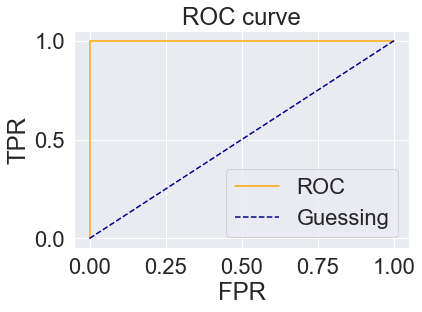

In [523]:
# create function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the fpr and tpr of a model
    """
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle="--",label='Guessing')
    
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend()
    plt.show() 
plot_roc_curve(fpr,tpr)    

In [524]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)# area under roc curve

1.0

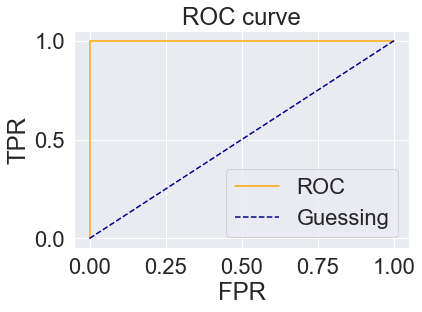

1.0

In [525]:
fpr,tpr,thresholds = roc_curve(y_test,y_test)#perfect curve
plot_roc_curve(fpr,tpr)
roc_auc_score(y_test,y_test)

#### Confusion Matrix
It is quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essense, giving you an idea of where the model is getting confused.

In [526]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[32,  0],
       [ 0, 29]], dtype=int64)

In [527]:
# visualise confusion metrics with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=['actual label'],
           colnames=['predicted label'])

predicted label,0,1
actual label,,
0,32,0
1,0,29


In [528]:
print(32+29)
y_preds.shape

61


(61,)

##### when you get module not found error

In [529]:
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn;

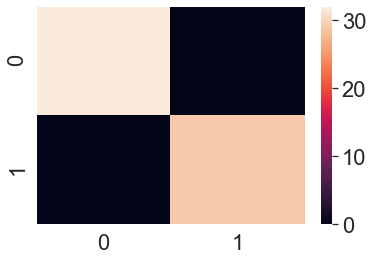

In [530]:
# another method to visualize confusion matrix: seaborn.heatmap()
import seaborn as sns

#set the font scale
sns.set(font_scale=2.0)

# create a confusion matrix
conf_matrix = confusion_matrix(y_test,y_preds)

#plot it using seaborn
sns.heatmap(conf_matrix);

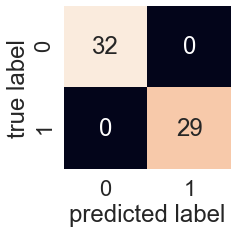

In [531]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot = True, #Anntate the boxes with conf_mat info
                    cbar=False)
    plt.xlabel('predicted label')
    plt.ylabel('true label');
#     bottom,top = ax.get_ylim()
#     ax.set_ylim(bottom+0.5,top-0.5);
    
plot_conf_mat(conf_matrix)
    

In [532]:
confusion_matrix(y_test,y_preds)

array([[32,  0],
       [ 0, 29]], dtype=int64)

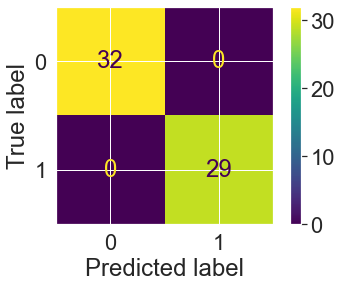

In [533]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,x_test,y_test);

##### classification report

In [534]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        29

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



* if model produces no false positives then precision=1
* if model produces no false negatives then recall=1
* f1-score is combination of precision and recall, perfect model has f1_score=1
* support = no. of samples each metric was calculated on
* accuracy = total accuracy in decimal form
* Macro avg = (1.0+1.0)/2 (class imbalance is not considered)
* Weighed avg = (1.0*32 + 1.0*29)/2  (w.r.t above example)

In [535]:
# why precision and recall are important
disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive case
disease_preds = np.zeros(10000) #model predicts every case as zero

pd.DataFrame(classification_report(disease_true,disease_preds,
                                  output_dict=True))


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


###### Note:
* accuracy is good measure when all classes are balnced(e.g same amount of samples which are labelled with 0 or 1).
* precision and recall are important when classes are imbalanced.

### 4.3.2 Regression model evaluation metrics

    1.R^2 (Coefficient of determination)
    2. Mean absolute error
    3. Mean squared error

In [536]:
from sklearn.datasets import load_boston
boston = load_boston()
boston
house_data = pd.DataFrame(boston['data'],
                         columns=boston['feature_names'])
house_data
house_data['target'] = pd.Series(boston['target'])
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


##### R^2
Compares your model's predictions to the mean of the targets. values can range from negative infinity to 1.<br>
e.g. if all your model does is predict the mean of the targets,it's R^2 value is 0.and if your model perfectly predicts the range of numbers then it's R^2 value would be 1.

In [537]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = house_data.drop('target',axis=1)
y = house_data['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [538]:
model.score(x_test,y_test)

0.8654448653350507

In [539]:
from sklearn.metrics import r2_score

#fill an array with y_test mean

y_test_mean = np.full(len(y_test),y_test.mean())
y_test.mean(),y_test_mean,y_test.shape;

In [540]:
r2_score(y_test,y_test_mean)# if predict the mean of the targets

2.220446049250313e-16

In [541]:
r2_score(y_test,y_test) #predict the exact value of the targets

1.0

In [542]:
y_preds = model.predict(x_test) # predict the possible values of the targets
r2_score(y_test,y_preds)

0.8654448653350507

#### Mean Absolue Error (MAE)

In [543]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)
mae

2.136382352941176

In [544]:
df = pd.DataFrame(data={'actual values':y_test,
                       'predicted values':y_preds})

df['difference'] = df['predicted values'] - df['actual values'] 
df

,actual values,predicted values,difference
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


#### Mean Square Error

In [545]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
mse

9.867437068627442

In [546]:
np.square(df['difference']).mean()

9.867437068627439

In [547]:
np.mean(df['difference'])

-0.16281372549019632

### Different evaluation metrics as sklearn functions
#### 1. classification model

In [548]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = disease.drop('target',axis=1)
y = disease['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

y_preds = clf.predict(x_test)

# Evaluation:
print('accuracy score:',accuracy_score(y_test,y_preds))
print('precision score:',precision_score(y_test,y_preds))
print('recall score:',recall_score(y_test,y_preds))
print('f1_score:',f1_score(y_test,y_preds))

accuracy score: 0.8524590163934426
precision score: 0.8484848484848485
recall score: 0.875
f1_score: 0.8615384615384615


#### 2.Regression model

In [549]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = house_data.drop('target',axis=1)
y = house_data['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)

y_preds = model.predict(x_test)

# evaluation:
print('R^2 score:',r2_score(y_test,y_preds))
print('MAE score:',mean_absolute_error(y_test,y_preds))
print('MSE score:',mean_squared_error(y_test,y_preds))

R^2 score: 0.8654448653350507
MAE score: 2.136382352941176
MSE score: 9.867437068627442


In [550]:
content

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choose the right algorithm/estimator for our problem',
 '3.Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. save and load a trained model',
 '7. putting it all together!']

### 5.Improving the model
First predictions are baseline predictions and first model is baseline model

From a data perspective:
* Could we collect more data? (generally, the more data the better)
* Could we improve our data?(more feature information)

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

parameters = model finds this patterns in the data

Hyperparameters = settings on a model that you can adjust to (potentially) improve it's ability to find patterns

#### Three ways to adjust hyperparameters
    1. By hand
    2. Randomly with RandomSearchCV
    3. Exhaustively with GridSearchCV

In [551]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params() #Hyper-parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 5.1 Tuning Hyperparameters By Hand

In [552]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust the following:
* `max_depth`
* `max_features`
* `mean_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [553]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparision on y_true and y_pred labels on
    classification model.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {'accuracy':round(accuracy,2),
                  'precision':round(precision,2),
                  'recall':round(recall,2),
                  'f1':round(f1,2)}
    print('accuracy:',round(accuracy,2))
    print('precision:',round(precision,2))
    print('recall:',round(recall,2))
    print('f1:',round(f1,2))
    return metric_dict

In [554]:
disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [555]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

shuffled_disease = disease.sample(frac=1)
shuffled_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [556]:
x = shuffled_disease.drop('target',axis=1)
y = shuffled_disease['target']

train_split = round(0.7*len(shuffled_disease))
valid_split = round(train_split+0.15*len(shuffled_disease))
x_train,y_train = x[:train_split],y[:train_split]
x_valid,y_valid = x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test = x[valid_split:],y[valid_split:]
x_train.shape,x_valid.shape,x_test.shape

((212, 13), (45, 13), (46, 13))

In [557]:
y_train.shape,y_valid.shape,y_test.shape

((212,), (45,), (46,))

In [558]:
shuffled_disease.shape

(303, 14)

In [559]:
np.random.seed(40)
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
#Make baseline predictions based on validation set
y_preds = clf.predict(x_valid)

# evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

accuracy: 0.8
precision: 0.79
recall: 0.88
f1: 0.83


{'accuracy': 0.8, 'precision': 0.79, 'recall': 0.88, 'f1': 0.83}

In [560]:
np.random.seed(40)

#create a second classifier with different hyperparameters
clf2 = RandomForestClassifier(n_estimators=1000)
clf2.fit(x_train,y_train)
y_preds2 = clf2.predict(x_valid)
clf2_metrics = evaluate_preds(y_valid,y_preds2)
clf2_metrics

accuracy: 0.82
precision: 0.81
recall: 0.88
f1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [561]:
##### Now let's try this model on the test data set

In [562]:
np.random.seed(40)

#create a second classifier with different hyperparameters
clf2 = RandomForestClassifier(n_estimators=1000)
clf2.fit(x_train,y_train)
y_preds2 = clf2.predict(x_test)
clf2_metrics_final = evaluate_preds(y_test,y_preds2)
clf2_metrics_final

accuracy: 0.83
precision: 0.87
recall: 0.8
f1: 0.83


{'accuracy': 0.83, 'precision': 0.87, 'recall': 0.8, 'f1': 0.83}

In [563]:
np.random.seed(40)

#create a second classifier with different hyperparameters
clf3 = RandomForestClassifier(n_estimators=1000,max_depth=50)
clf3.fit(x_train,y_train)
y_preds3 = clf3.predict(x_valid)
clf3_metrics = evaluate_preds(y_valid,y_preds3)
clf3_metrics

accuracy: 0.82
precision: 0.81
recall: 0.88
f1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

#### 5.2 Hyperparameter tuning with RandomizedSearchCV()

In [564]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators':[100,200,500,1000,1200],
       'max_depth':[None,5,10,20,30],
        'max_features':['auto','sqrt'],
       'min_samples_split':[2,4,6],
       'min_samples_leaf':[1,2,4]}

np.random.seed(40)

x = shuffled_disease.drop('target',axis=1)
y = shuffled_disease['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf = RandomForestClassifier(n_jobs=1) #computer processor part

#set up the RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10,#no. of models to try
                           cv=5,
                           verbose=2)
# Fit the RandomizedSearchCV version of clf to the data
rs_clf.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, total=   1.4s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, total=   1.8s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, total=   1.6s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, total=   1.6s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, total=   1.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   3.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_le

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         1200]},
                   verbose=2)

In [565]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

In [566]:
rs_y_preds = rs_clf.predict(x_test)

rs_metrics = evaluate_preds(y_test,rs_y_preds)

accuracy: 0.85
precision: 0.83
recall: 0.91
f1: 0.87


#### 5.3 Hyperparameter tuning with GridSearchCV

In [567]:
grid

{'n_estimators': [100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [568]:
6*5*2*3*3*5

2700

In [569]:
# based on previous best parameters by RandomizedSearchCV()
grid2 = {'n_estimators':[100,200,500],
       'max_depth':[None],
        'max_features':['auto','sqrt'],
       'min_samples_split':[2],
       'min_samples_leaf':[1,2]}

In [570]:
3*1*2*1*2*5

60

In [571]:
from sklearn.model_selection import GridSearchCV,train_test_split

grid2 = {'n_estimators':[100,200,500],
       'max_depth':[None],
        'max_features':['auto','sqrt'],
       'min_samples_split':[2],
       'min_samples_leaf':[1,2]}

np.random.seed(40)

x = shuffled_disease.drop('target',axis=1)
y = shuffled_disease['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf = RandomForestClassifier(n_jobs=1) #computer processor part

#set up the GridSearchCV
gr_clf = GridSearchCV(estimator=clf,
                           param_grid=grid2,
                           cv=5,
                           verbose=2)
# Fit the GridSearchCV version of clf to the data
gr_clf.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   1.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.9s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   35.0s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [2],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [572]:
gr_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [573]:
gr_y_preds = gr_clf.predict(x_test)

gr_metrics = evaluate_preds(y_test,gr_y_preds)

accuracy: 0.85
precision: 0.83
recall: 0.91
f1: 0.87


Let's compare our different models metrics

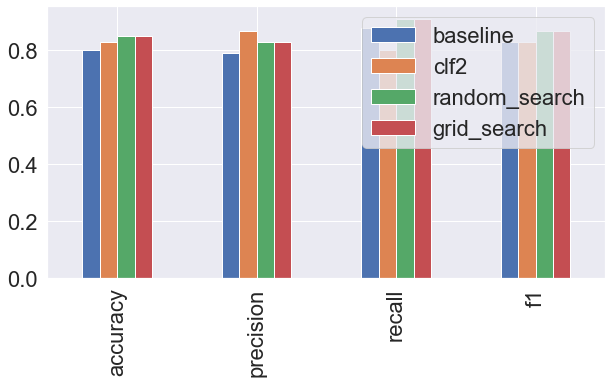

In [574]:
compare_metrics = pd.DataFrame({'baseline':baseline_metrics,
                               'clf2':clf2_metrics_final,
                               'random_search':rs_metrics,
                               'grid_search':gr_metrics})

compare_metrics.plot.bar(figsize=(10,5));

In [575]:
compare_metrics

,baseline,clf2,random_search,grid_search
accuracy,0.80,0.83,0.85,0.85
precision,0.79,0.87,0.83,0.83
recall,0.88,0.80,0.91,0.91
f1,0.83,0.83,0.87,0.87


In [576]:
content

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choose the right algorithm/estimator for our problem',
 '3.Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. save and load a trained model',
 '7. putting it all together!']

### 6.Saving and Loading a trained Machine Learning model

There are two ways to do that:
* with python's `pickle` module
* with the `joblib` module

**Pickle**

In [577]:
import pickle

#save an existing model(object) to file
pickle.dump(gr_clf,open('gs_rf_model1.pkl','wb'))


<ipython-input-577-180110083a4e>:4: ResourceWarning: unclosed file <_io.BufferedWriter name='gs_rf_model1.pkl'>
  pickle.dump(gr_clf,open('gs_rf_model1.pkl','wb'))


In [578]:
# Load a saved model
loaded_gr_model = pickle.load(open('gs_rf_model1.pkl','rb'))

<ipython-input-578-228a77f2d6a7>:2: ResourceWarning: unclosed file <_io.BufferedReader name='gs_rf_model1.pkl'>
  loaded_gr_model = pickle.load(open('gs_rf_model1.pkl','rb'))


In [579]:
# make some predictions
gr_model_preds = loaded_gr_model.predict(x_test)
evaluate_preds(y_test,gr_model_preds)

accuracy: 0.85
precision: 0.83
recall: 0.91
f1: 0.87


{'accuracy': 0.85, 'precision': 0.83, 'recall': 0.91, 'f1': 0.87}

**Joblib**

In [580]:
from joblib import dump,load

#save model to file
dump(gr_clf,filename='gr_rf_model.joblib')

['gr_rf_model.joblib']

In [581]:
# load saved joblib model
loaded_gr_joblib = load(filename='gr_rf_model.joblib')

In [582]:
#evaluation:
joblib_y_preds = loaded_gr_joblib.predict(x_test)
evaluate_preds(y_test,joblib_y_preds)

accuracy: 0.85
precision: 0.83
recall: 0.91
f1: 0.87


{'accuracy': 0.85, 'precision': 0.83, 'recall': 0.91, 'f1': 0.87}

In [583]:
content

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choose the right algorithm/estimator for our problem',
 '3.Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. save and load a trained model',
 '7. putting it all together!']

##### Note:
if model is large go for joblib.

In [589]:
content

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choose the right algorithm/estimator for our problem',
 '3.Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. save and load a trained model',
 '7. putting it all together!']

### 7. Putting it all together

In [586]:
data = pd.read_csv('car-sales-extended-missing-data.csv')
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [587]:
data.isna().sum()  #missing data

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [588]:
data.dtypes    # checking if all data is numerical

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

Steps we want to do (all in one cell):
1. fill missing data
2. convert data to numbers
3. build a model on data

In [3]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

# setting up the random seed
import numpy as np
np.random.seed(42)

# import data and drop rows with missing labels
data = pd.read_csv('car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'],inplace=True)

# define different features and transformer pipeline
catagorical_features = ['Make','Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
     ('onehot',OneHotEncoder(handle_unknown='ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value=4))
])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline([
    ('imputer',SimpleImputer(strategy='mean'))
])

# set up the preprocessing steps(fill missing values and then convert to numbers)
preprocessor = ColumnTransformer(
                transformers=[
                    ('cat',categorical_transformer,catagorical_features),
                    ('door',door_transformer,door_feature),
                    ('num',numeric_transformer,numeric_features)
                ])

# create a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor())
])

# split data
x = data.drop('Price',axis=1)
y = data['Price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# fit and score the model
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.22188417408787875

It's also possible to use GridSearchCV or RandomizedSearchCV with our pipeline

In [6]:
# use GridSearchCV with our Regression pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid = {
    'preprocessor__num__imputer__strategy':['mean','median'],
    'model__n_estimators':[100,1000],
    'model__max_depth':[None,5],
    'model__max_features':['auto'],
    'model__min_samples_split':[2,4]
}

gr_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gr_model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.8s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.8s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.8min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [7]:
gr_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'auto',
 'model__min_samples_split': 2,
 'model__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}

In [8]:
gr_model.score(x_test,y_test)

0.3339554263158365